In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_dataframes(file_pattern):
    return pd.concat([pd.read_csv(file) for file in glob.glob(file_pattern)], sort=False)


def aggregate_score(dataframe, func, name_column='Name'):
    return dataframe.groupby(name_column).agg(func).reset_index()


In [3]:
output_dir = 'config1'
dir_path = 'outputs/' + output_dir +'/'

df = read_dataframes(f'{dir_path}*.csv')
df_mean = aggregate_score(df, np.mean)
df_std = aggregate_score(df, np.std)

In [4]:
df.head()

,Accuracy,Cost,F1,Name,Precision,Recall,Savings
0,0.999214,12851.51,0.736842,CI-LogisticRegression,0.875000,0.636364,0.467914
1,0.998952,12528.62,0.691358,CI-DecisionTree,0.704403,0.678788,0.481283
2,0.999392,9937.27,0.804054,CI-RandomForest,0.908397,0.721212,0.588571
3,0.999392,9804.84,0.810458,CI-XGBoost,0.879433,0.751515,0.594054
4,0.650680,30745.91,0.004540,CST-CostSensitiveLogisticRegression,0.002281,0.460606,-0.272960


In [5]:
df_mean.head()

,Name,Accuracy,Cost,F1,Precision,Recall,Savings
0,CI-DecisionTree,0.999097,7350.9356,0.738904,0.739747,0.738909,0.643190
1,CI-DecisionTree-BMR,0.990836,6238.0266,0.215057,0.128978,0.683152,0.692470
2,CI-DecisionTree-TO,0.999097,7350.9356,0.738904,0.739747,0.738909,0.643190
3,CI-LogisticRegression,0.999184,10408.3604,0.724999,0.868134,0.623879,0.495960
4,CI-LogisticRegression-BMR,0.991570,3653.9370,0.248240,0.150590,0.756364,0.822713


In [6]:
results = pd.DataFrame(df_mean.Name.str.split('-').values.tolist(), columns=['Model class', 'Model', 'Extra model'])
results = pd.concat([df_mean, results], axis = 1)
results = results.drop(['Name'], axis = 1)

In [7]:
results.sort_values('Savings')

,Accuracy,Cost,F1,Precision,Recall,Savings,Model class,Model,Extra model
13,0.456525,33860.1138,0.004937,0.002482,0.612242,-0.691490,CST,CostSensitiveLogisticRegression,None
3,0.999184,10408.3604,0.724999,0.868134,0.623879,0.495960,CI,LogisticRegression,None
0,0.999097,7350.9356,0.738904,0.739747,0.738909,0.643190,CI,DecisionTree,None
2,0.999097,7350.9356,0.738904,0.739747,0.738909,0.643190,CI,DecisionTree,TO
6,0.999471,6738.4362,0.829949,0.932926,0.748242,0.674880,CI,RandomForest,None
9,0.999492,6473.4850,0.840999,0.917360,0.777333,0.687600,CI,XGBoost,None
1,0.990836,6238.0266,0.215057,0.128978,0.683152,0.692470,CI,DecisionTree,BMR
12,0.998814,6258.2970,0.695529,0.677478,0.734545,0.694379,CST,CostSensitiveDecisionTreeClassifier,None
5,0.984560,5680.1944,0.449596,0.391121,0.842667,0.723253,CI,LogisticRegression,TO
8,0.997118,4861.3750,0.552503,0.457429,0.839758,0.764490,CI,RandomForest,TO


In [8]:
results.sort_values(['Model', 'Savings'])

,Accuracy,Cost,F1,Precision,Recall,Savings,Model class,Model,Extra model
12,0.998814,6258.2970,0.695529,0.677478,0.734545,0.694379,CST,CostSensitiveDecisionTreeClassifier,None
13,0.456525,33860.1138,0.004937,0.002482,0.612242,-0.691490,CST,CostSensitiveLogisticRegression,None
0,0.999097,7350.9356,0.738904,0.739747,0.738909,0.643190,CI,DecisionTree,None
2,0.999097,7350.9356,0.738904,0.739747,0.738909,0.643190,CI,DecisionTree,TO
1,0.990836,6238.0266,0.215057,0.128978,0.683152,0.692470,CI,DecisionTree,BMR
3,0.999184,10408.3604,0.724999,0.868134,0.623879,0.495960,CI,LogisticRegression,None
5,0.984560,5680.1944,0.449596,0.391121,0.842667,0.723253,CI,LogisticRegression,TO
4,0.991570,3653.9370,0.248240,0.150590,0.756364,0.822713,CI,LogisticRegression,BMR
6,0.999471,6738.4362,0.829949,0.932926,0.748242,0.674880,CI,RandomForest,None
8,0.997118,4861.3750,0.552503,0.457429,0.839758,0.764490,CI,RandomForest,TO


In [9]:
df_std

,Name,Accuracy,Cost,F1,Precision,Recall,Savings
0,CI-DecisionTree,0.000108,1989.876335,0.030461,0.034780,0.035505,0.072506
1,CI-DecisionTree-BMR,0.002614,1238.250752,0.049714,0.035686,0.040240,0.061410
2,CI-DecisionTree-TO,0.000108,1989.876335,0.030461,0.034780,0.035505,0.072506
3,CI-LogisticRegression,0.000064,2573.684320,0.027487,0.025677,0.041003,0.083724
4,CI-LogisticRegression-BMR,0.002374,1379.456621,0.055847,0.042706,0.034021,0.059019
5,CI-LogisticRegression-TO,0.034172,2046.947579,0.286127,0.309629,0.064523,0.094082
6,CI-RandomForest,0.000062,2159.248088,0.021619,0.023588,0.031793,0.080811
7,CI-RandomForest-BMR,0.001469,1404.813302,0.077094,0.072122,0.032839,0.060906
8,CI-RandomForest-TO,0.001597,1588.680085,0.180901,0.251119,0.036858,0.066015
9,CI-XGBoost,0.000061,1968.156966,0.020120,0.027296,0.030753,0.072289


In [10]:
df.sort_values(['Name', 'Savings'])

,Accuracy,Cost,F1,Name,Precision,Recall,Savings
1,0.998899,12622.11,0.702550,CI-DecisionTree,0.659574,0.751515,0.449201
1,0.998952,12528.62,0.691358,CI-DecisionTree,0.704403,0.678788,0.481283
1,0.998879,9554.40,0.691643,CI-DecisionTree,0.659341,0.727273,0.517492
1,0.999057,7521.16,0.718750,CI-DecisionTree,0.741935,0.696970,0.537722
1,0.999004,8763.97,0.709480,CI-DecisionTree,0.716049,0.703030,0.541772
1,0.998931,9570.56,0.692771,CI-DecisionTree,0.688623,0.696970,0.546055
1,0.999099,8461.41,0.732919,CI-DecisionTree,0.751592,0.715152,0.565879
1,0.999046,11259.43,0.716511,CI-DecisionTree,0.737179,0.696970,0.567850
1,0.998973,8063.22,0.706587,CI-DecisionTree,0.698225,0.715152,0.574247
1,0.999182,8307.88,0.760736,CI-DecisionTree,0.770186,0.751515,0.578812


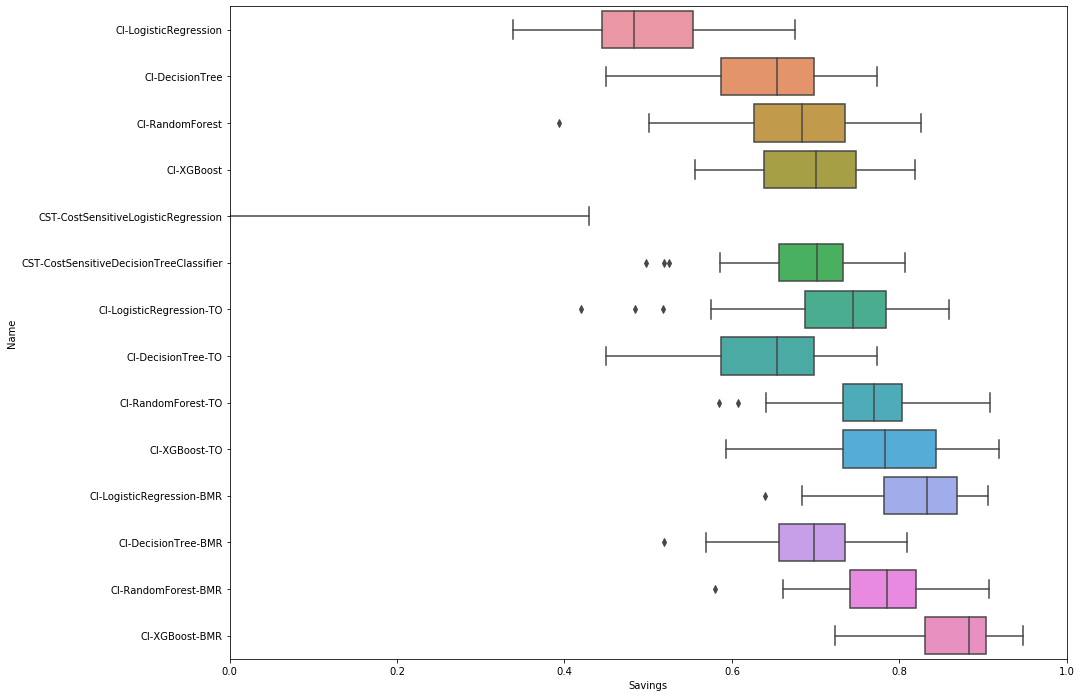

In [11]:
data = df #[df['Savings'] > 0]

fig, ax = plt.subplots(figsize = (15, 12))

sns.boxplot(x = 'Savings', y = 'Name', data = data, ax = ax)
ax.set_xlim([0, 1])
plt.show()